<a href="https://colab.research.google.com/github/Shameem-Yuseph/DSA_2025/blob/main/Customer_Prediction_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("td.csv")
print(df.head())
print(df.columns)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  6080-TCMYC    Male              0     Yes        Yes      40          Yes   
1  7285-KLOTR  Female              0     Yes         No      12          Yes   
2  7486-KSRVI    Male              0      No         No      43          Yes   
3  9924-JPRMC    Male              0      No         No      72          Yes   
4  4439-YRNVD  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0               Yes     Fiber optic             No  ...              Yes   
1               Yes             DSL            Yes  ...              Yes   
2               Yes     Fiber optic             No  ...               No   
3               Yes     Fiber optic            Yes  ...              Yes   
4  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.shape

(1409, 21)

In [ ]:
coll = df.select_dtypes(include='float64')
coll

,MonthlyCharges
0,81.20
1,78.85
2,100.00
3,118.20
4,36.25
...,...
1404,55.45
1405,75.45
1406,75.15
1407,20.20


array([[<Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

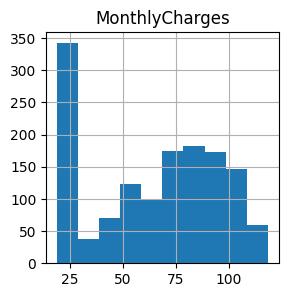

In [ ]:
coll.hist(figsize=(3,3))

In [ ]:
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True) # wave = median, slope = mean
df.isnull().sum()

/tmp/ipython-input-695603754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True) # wave = median, slope = mean


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['TotalCharges'].replace([' ', ''], np.nan, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

/tmp/ipython-input-1719092096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0], inplace=True)
/tmp/ipython-input-1719092096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.30,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-3512097001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
dt = pd.get_dummies(df, dtype='int64')
dt

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0019-GFNTW,customerID_0021-IKXGC,customerID_0022-TCJCI,customerID_0030-FNXPP,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,40,81.20,3292.30,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,12,78.85,876.75,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,0,43,100.00,4211.55,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,0,72,118.20,8547.15,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
4,0,10,36.25,374.00,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,27,55.45,1477.65,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
1405,1,2,75.45,158.40,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1406,0,3,75.15,216.75,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1407,0,53,20.20,1068.15,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [ ]:
x = dt.drop(columns=["Churn_No", "Churn_Yes"])
y = dt["Churn_Yes"]
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

x_train.shape

(1056, 1454)

In [ ]:
from sklearn.linear_model import LogisticRegression
legit_model = LogisticRegression()
legit_model.fit(x_train, y_train)
y_pred = legit_model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Precision Score : ", precision_score(y_test, y_pred))
print("Recall Score : ", recall_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))

Accuracy :  0.7932011331444759
Confusion Matrix : 
 [[230  32]
 [ 41  50]]
Precision Score :  0.6097560975609756
Recall Score :  0.5494505494505495
F1 Score :  0.5780346820809249
